In [59]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import statistics
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn import preprocessing
from scipy.stats import norm
from sklearn import utils
plt.style.use("bmh")
plt.style.use("ggplot")

In [60]:
try:
  data = pd.read_csv("merged.csv")
  print("The data from the file loaded and ready to be use.")
except:
  print("Error.")

The data from the file loaded and ready to be use.


In [61]:
data

,Date,Carrot's Price,Cauliflower's Price,Cucumber's Price,Eggplant's Price,Orenge Melon's Price,Red Pepper's Price,Tomato's Price,Watermelon's Price,White onion's Price,Zucchini's Price
0,01/01/2018,3.8,3.0,5.0,2.8,4.0,4.5,3.4,NaN,3.0,4.5
1,01/01/2019,4.4,4.5,4.0,NaN,5.5,6.0,6.5,NaN,NaN,5.0
2,01/01/2020,4.0,4.5,5.0,2.5,5.5,5.3,6.0,5.5,3.0,6.5
3,01/01/2023,3.7,5.5,5.0,3.5,5.5,6.5,6.0,5.0,3.5,4.0
4,01/02/2018,3.8,3.8,6.0,2.8,7.5,5.0,3.2,NaN,3.0,7.5
...,...,...,...,...,...,...,...,...,...,...,...
1341,31/10/2021,4.7,5.0,3.7,5.5,5.0,6.5,4.7,3.5,2.7,6.5
1342,31/10/2022,4.8,5.5,5.0,5.2,5.5,8.0,6.5,5.0,3.8,6.0
1343,31/12/2018,4.4,5.0,3.8,NaN,5.5,6.0,6.5,NaN,NaN,5.0
1344,31/12/2019,4.0,5.0,4.6,2.5,5.5,5.3,6.0,5.5,2.8,6.3


In [62]:
import re

# Define regular expressions to match fruits and vegetables in column names
fruit_regex = re.compile(r'^(Watermelon|Orange Melon|Zucchini|Red Pepper|Tomato|Cucumber|Eggplant)')
vegetable_regex = re.compile(r'^(Cauliflower|Carrot|White Onion)')

# Replace the old column names with new column names
new_column_names = {
    "Watermelon's Price": "Watermelon",
    "Orenge Melon's Price": "Orange Melon",
    "Cauliflower's Price": "Cauliflower",
    "Carrot's Price": "Carrot",
    "Zucchini's Price": "Zucchini",
    "Red Pepper's Price": "Red Pepper",
    "White onion's Price": "White Onion",
    "Tomato's Price": "Tomato",
    "Cucumber's Price": "Cucumber",
    "Eggplant's Price": "Eggplant"
}
data.rename(columns=new_column_names, inplace=True)


In [63]:
# Convert the Date column to datetime format
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)

# Calculate the average price for each vegetable in each week
grouped_weekly = data.groupby(data['Date'].dt.isocalendar().week)[['Carrot', 'Cauliflower', 'Cucumber', 'Eggplant', 'Orange Melon', 'Red Pepper', 'Tomato', 'Watermelon', 'White Onion', 'Zucchini']].transform('mean')

# Fill null values with the average price in the same week
data_filled = data.copy()
data_filled.iloc[:, 1:-1] = data_filled.iloc[:, 1:-1].fillna(grouped_weekly)

# Forward fill null values in each column
data_filled = data.fillna(method='ffill')


In [64]:
# Count the null values in each column
null_counts = data.isnull().sum()

# Display the null counts
print(null_counts)

Date              0
Carrot            0
Cauliflower       0
Cucumber          0
Eggplant        503
Orange Melon      0
Red Pepper        0
Tomato            0
Watermelon      786
White Onion     528
Zucchini          0
dtype: int64


In [65]:
print("There are",data.shape[0],"rows and",data.shape[1],"columns in the file")

There are 1346 rows and 11 columns in the file


In [66]:
import re

# Define regular expressions to match fruits and vegetables in column names
fruit_regex = re.compile(r'^(Watermelon|Orange Melon)$', re.IGNORECASE)
vegetable_regex = re.compile(r'^(Cauliflower|Carrot|Zucchini|Red Pepper|White Onion|Tomato|Cucumber|Eggplant)$', re.IGNORECASE)

# Count the number of fruits and vegetables in the new column names
fruit_count = 0
vegetable_count = 0

for column in new_column_names.values():
    if fruit_regex.match(column):
        fruit_count += 1
    elif vegetable_regex.match(column):
        vegetable_count += 1

# Print the results
print("Number of fruits:", fruit_count)
print("Number of vegetables:", vegetable_count)


Number of fruits: 2
Number of vegetables: 8


In [67]:
# Calculate the average price for each column (excluding non-numeric columns)
mean_prices = data.select_dtypes(include='number').mean()

# Print the average price for each column
print("Average price for each column:")
for column, mean_price in mean_prices.iteritems():
    print(column, ":", mean_price)


Average price for each column:
Carrot : 4.254977711738484
Cauliflower : 6.1620356612184235
Cucumber : 4.940787518573548
Eggplant : 4.64317912218268
Orange Melon : 5.653789004457657
Red Pepper : 7.097473997028234
Tomato : 5.054531946508179
Watermelon : 4.592678571428569
White Onion : 3.2927872860635743
Zucchini : 5.533878157503719


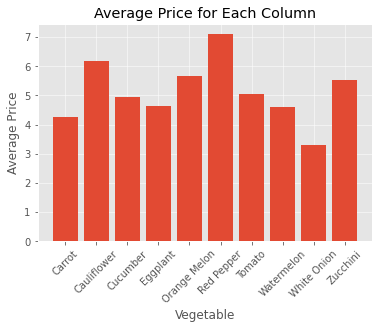

In [68]:
import matplotlib.pyplot as plt

# Calculate the average price for each column (excluding non-numeric columns)
mean_prices = data.select_dtypes(include='number').mean()

# Create a bar plot of the average prices
plt.bar(mean_prices.index, mean_prices)

# Set plot title and labels
plt.title('Average Price for Each Column')
plt.xlabel('Vegetable')
plt.ylabel('Average Price')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Display the plot
plt.show()


In [69]:
# Convert the Date column to datetime format
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)

# Add a Season column based on the month
data['Season'] = pd.cut(data['Date'].dt.month, [0,2,5,9,12], labels=['Winter','Spring','Summer','Autumn'])

# Calculate the average price for each vegetable in each season
grouped = data.groupby(['Season']).mean()

    # Find the highest average price for each vegetable and the corresponding season
for col in grouped.columns:
    max_price = grouped[col].max()
    max_season = grouped[col].idxmax()
    print(f"The most expensive season for {col} is {max_season} with an average price of {max_price:.2f}")


The most expensive season for Carrot is Autumn with an average price of 4.54
The most expensive season for Cauliflower is Summer with an average price of 7.51
The most expensive season for Cucumber is Spring with an average price of 5.20
The most expensive season for Eggplant is Winter with an average price of 5.03
The most expensive season for Orange Melon is Winter with an average price of 6.70
The most expensive season for Red Pepper is Summer with an average price of 7.55
The most expensive season for Tomato is Autumn with an average price of 5.51
The most expensive season for Watermelon is Winter with an average price of 5.15
The most expensive season for White Onion is Spring with an average price of 3.98
The most expensive season for Zucchini is Summer with an average price of 5.80


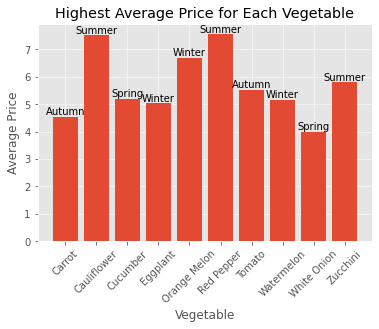

In [70]:
import matplotlib.pyplot as plt

# Find the highest average price for each vegetable and the corresponding season
max_prices = []
max_seasons = []
vegetables = []

for col in grouped.columns:
    max_price = grouped[col].max()
    max_season = grouped[col].idxmax()
    max_prices.append(max_price)
    max_seasons.append(max_season)
    vegetables.append(col)

# Create a bar plot of the highest average prices
plt.bar(vegetables, max_prices)

# Set plot title and labels
plt.title('Highest Average Price for Each Vegetable')
plt.xlabel('Vegetable')
plt.ylabel('Average Price')

# Add text labels for the corresponding seasons
for i in range(len(vegetables)):
    plt.text(vegetables[i], max_prices[i], max_seasons[i], ha='center', va='bottom')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Display the plot
plt.show()

In [71]:
# Find the lowest average price for each vegetable and the corresponding season
for col in grouped.columns:
    min_price = grouped[col].min()
    min_season = grouped[col].idxmin()
    print(f"The cheapest season for {col} is {min_season} with an average price of {min_price:.2f}")


The cheapest season for Carrot is Spring with an average price of 4.00
The cheapest season for Cauliflower is Winter with an average price of 4.65
The cheapest season for Cucumber is Summer with an average price of 4.71
The cheapest season for Eggplant is Autumn with an average price of 4.26
The cheapest season for Orange Melon is Summer with an average price of 4.57
The cheapest season for Red Pepper is Winter with an average price of 6.18
The cheapest season for Tomato is Summer with an average price of 4.58
The cheapest season for Watermelon is Summer with an average price of 3.34
The cheapest season for White Onion is Summer with an average price of 2.66
The cheapest season for Zucchini is Spring with an average price of 5.17


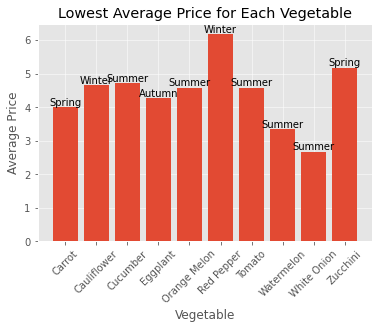

In [72]:
import matplotlib.pyplot as plt

# Find the lowest average price for each vegetable and the corresponding season
min_prices = []
min_seasons = []
vegetables = []

for col in grouped.columns:
    min_price = grouped[col].min()
    min_season = grouped[col].idxmin()
    min_prices.append(min_price)
    min_seasons.append(min_season)
    vegetables.append(col)

# Create a bar plot of the lowest average prices
plt.bar(vegetables, min_prices)

# Set plot title and labels
plt.title('Lowest Average Price for Each Vegetable')
plt.xlabel('Vegetable')
plt.ylabel('Average Price')

# Add text labels for the corresponding seasons
for i in range(len(vegetables)):
    plt.text(vegetables[i], min_prices[i], min_seasons[i], ha='center', va='bottom')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Display the plot
plt.show()


In [111]:
# Weight of each single vegetables - 
# Cucumber - 300 grams
# Tomato - 100 grams
# Red Pepper - 150 grams
# Carrot - 150 grams

In [112]:
weights = {
    'Cucumber': 0.300,
    'Tomato': 0.100,
    'Red Pepper': 0.150,
    'Carrot': 0.150
}

# Calculate the salad weight for each record
data['Salad'] = data[['Cucumber', 'Tomato', 'Red Pepper', 'Carrot']].mul(pd.Series(weights)).sum(axis=1)

# Print the updated data with the new "salad" column
print(data)


           Date  Carrot  Cauliflower  Cucumber  Eggplant  Orange Melon  \
0    2018-01-01     3.8          3.0       5.0       2.8           4.0   
45   2018-01-02     3.8          3.0       5.2       2.8           4.0   
92   2018-01-03     3.8          3.7       5.5       3.0           4.0   
138  2018-01-04     3.8          3.7       5.5       3.0           4.0   
268  2018-01-07     3.8          3.5       5.7       3.0           4.0   
...         ...     ...          ...       ...       ...           ...   
773  2023-05-18     5.0          6.0       4.5       5.0           4.5   
905  2023-05-21     4.0          6.0       4.0       5.0           4.5   
950  2023-05-22     5.0          6.0       4.3       5.0           4.0   
998  2023-05-23     4.0          6.5       4.8       5.0           5.5   
1044 2023-05-24     4.0          7.5       5.5       5.0           5.5   

      Red Pepper  Tomato  Watermelon  White Onion  Zucchini  Season  Salad  \
0            4.5     3.4         

In [113]:
# Convert the "Date" column to datetime format (if it's not already)
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)

# Group the data by the day of the week and calculate the average salad weight
average_salad_by_day = data.groupby(data['Date'].dt.dayofweek)['Salad'].mean()

# Print the average salad weight for each day of the week
print("Average salad cost for each day of the week:")
for day, average_weight in average_salad_by_day.iteritems():
    day_name = data['Date'].dt.day_name().unique()[day]
    print(day_name, ":", average_weight)

Average salad cost for each day of the week:
Monday : 3.661660447761191
Tuesday : 3.6732287822878225
Wednesday : 3.7208550185873612
Thursday : 3.75414814814815
Sunday : 3.26
Saturday : 3.8
Friday : 3.6427547169811323


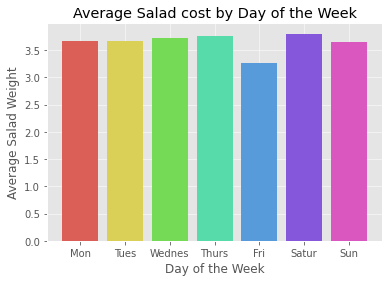

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns

average_cost_by_day = data.groupby(data['Date'].dt.dayofweek)['Salad'].mean()

# Convert the "Date" column to datetime format (if it's not already)
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)

# Group the data by the day of the week and calculate the average salad weight
average_salad_by_day = data.groupby(data['Date'].dt.dayofweek)['Salad'].mean()

# Create a color palette for the days of the week
colors = sns.color_palette('hls', len(average_salad_by_day))

# Create a bar plot of the average salad weight for each day of the week
plt.bar(average_salad_by_day.index, average_salad_by_day, color=colors)

# Set plot title and labels
plt.title('Average Salad cost by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Salad Weight')

# Customize x-axis labels to show day names instead of numeric values
day_names = ['Mon', 'Tues', 'Wednes', 'Thurs', 'Fri', 'Satur', 'Sun']
plt.xticks(average_salad_by_day.index, day_names)

# Display the plot
plt.show()


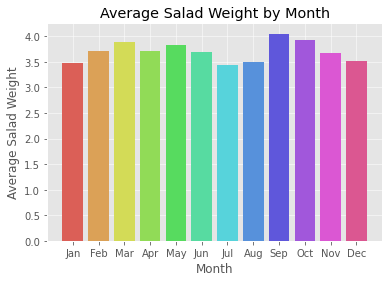

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the "Date" column to datetime format (if it's not already)
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)

# Group the data by the month and calculate the average salad weight
average_salad_by_month = data.groupby(data['Date'].dt.month)['Salad'].mean()

# Create a color palette for the months
colors = sns.color_palette('hls', len(average_salad_by_month))

# Create a bar plot of the average salad weight for each month
plt.bar(average_salad_by_month.index, average_salad_by_month, color=colors)

# Set plot title and labels
plt.title('Average Salad Weight by Month')
plt.xlabel('Month')
plt.ylabel('Average Salad Weight')

# Customize x-axis tick labels to show month names instead of numeric values
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(average_salad_by_month.index, month_names)

# Display the plot
plt.show()


Average salad cost for each month:
Jan : 3.4702985074626858
Feb : 3.713750000000002
Mar : 3.8829924242424245
Apr : 3.7188053097345093
May : 3.823483606557376
Jun : 3.6906132075471687
Jul : 3.4348181818181795
Aug : 3.5017567567567562
Sep : 4.049518072289157
Oct : 3.933020833333334
Nov : 3.668055555555556
Dec : 3.5136486486486485


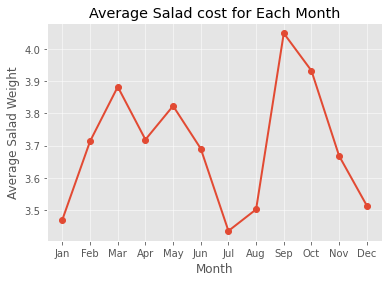

In [116]:
import matplotlib.pyplot as plt

# Convert the "Date" column to datetime format (if it's not already)
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)

# Group the data by month and calculate the average salad weight
monthly_avg_salad = data.groupby(data['Date'].dt.month)['Salad'].mean()

# Print the average salad weight for each month
print("Average salad cost for each month:")
for month, avg_weight in monthly_avg_salad.iteritems():
    month_name = data['Date'].dt.strftime('%b').unique()[month-1]
    print(month_name, ":", avg_weight)

# Plot the average salad weight for each month
plt.plot(monthly_avg_salad.index, monthly_avg_salad, marker='o')

# Set plot title and labels
plt.title('Average Salad cost for Each Month')
plt.xlabel('Month')
plt.ylabel('Average Salad Weight')

# Customize x-axis tick labels to show month names
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(monthly_avg_salad.index, month_names)

# Display the plot
plt.show()


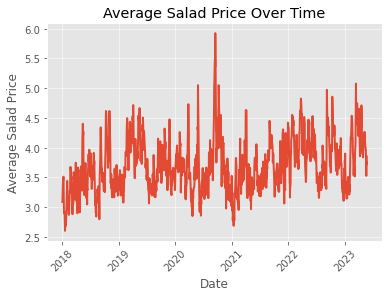

In [117]:
# Convert the "Date" column to datetime format (if it's not already)
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)

# Calculate the average salad price for each date
average_salad_price = data.groupby('Date')['Salad'].mean()

# Create a line plot to visualize the average salad price over time
plt.plot(average_salad_price.index, average_salad_price)

# Set plot title and labels
plt.title('Average Salad Price Over Time')
plt.xlabel('Date')
plt.ylabel('Average Salad Price')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Display the plot
plt.show()

